In [1]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import env
import wrangle
import acquire
import split_scale


Gather

In [2]:
df = acquire.prep_iris()


Split

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
X = df[['sepal_length','sepal_width','petal_length','petal_width']]
y = df[['species']]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
114,5.8,2.8,5.1,2.4
136,6.3,3.4,5.6,2.4
53,5.5,2.3,4.0,1.3
19,5.1,3.8,1.5,0.3
38,4.4,3.0,1.3,0.2


In [6]:
y_train.head()

,species
114,2
136,2
53,1
19,0
38,0


Create Basic Model


Create the logistic regression object


In [7]:
logit = LogisticRegression(C=1, class_weight={1:2}, random_state = 123, solver='sag')

Fit the model to the training data

In [8]:
logit.fit(X_train, y_train)

LogisticRegression(C=1, class_weight={1: 2}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=123, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

Print the coefficients and intercept of the model

In [9]:
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

Coefficient: 
 [[ 0.26037628  1.33313224 -2.27242077 -1.00776206]
 [ 0.32303258 -1.66761917  0.67005208 -1.37719915]
 [-1.42605865 -1.55750884  2.5451368   2.42356492]]
Intercept: 
 [ 1.05112388  2.36475819 -3.74241718]


Predict Labels

In [10]:
y_pred = logit.predict(X_train)
print(pd.DataFrame(confusion_matrix(y_train,y_pred)))

    0   1   2
0  32   0   0
1   0  40   0
2   0   6  27


In [11]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.87      1.00      0.93        40
           2       1.00      0.82      0.90        33

    accuracy                           0.94       105
   macro avg       0.96      0.94      0.94       105
weighted avg       0.95      0.94      0.94       105



Estimate the probability of a passenger surviving, using the training data

In [12]:
y_pred_proba = logit.predict_proba(X_train)

Evaluate Model

Compute the accuracy

In [13]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.94


Create a confusion matrix

In [14]:
print(confusion_matrix(y_train, y_pred))

[[32  0  0]
 [ 0 40  0]
 [ 0  6 27]]


Compute Precision, Recall, F1-score, and Support

In [15]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.87      1.00      0.93        40
           2       1.00      0.82      0.90        33

    accuracy                           0.94       105
   macro avg       0.96      0.94      0.94       105
weighted avg       0.95      0.94      0.94       105



Test Model

Compute the accuracy of the model when run on the test data

In [16]:
print('Accuracy of Logistic Regression classifier on test set: {:.2f}'
     .format(logit.score(X_test, y_test)))

Accuracy of Logistic Regression classifier on test set: 0.89


Visualize Model

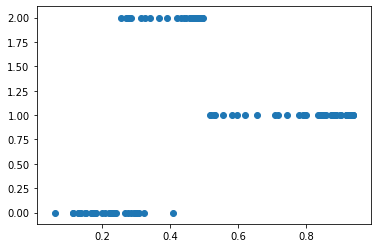

In [17]:
## verify
y_pred_proba = [i[1] for i in y_pred_proba]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(y_pred_proba, y_pred)

Look in the scikit-learn documentation to research the solver parameter. What is your best option(s) for the particular problem you are trying to solve and the data to be used?
Run through steps 2-4 using another solver (from question 5)
Which performs better on your in-sample data?

In [18]:
logit2 = LogisticRegression(C=1, class_weight={1:2}, random_state = 123, solver='liblinear')

In [19]:
logit2

LogisticRegression(C=1, class_weight={1: 2}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=123, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
logit2.fit(X_train, y_train)

LogisticRegression(C=1, class_weight={1: 2}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=123, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
print('Coefficient: \n', logit2.coef_)
print('Intercept: \n', logit2.intercept_)

Coefficient: 
 [[ 0.38421538  1.32718255 -2.11307588 -0.94269552]
 [ 0.52119534 -1.49883271  0.64596498 -1.43290501]
 [-1.517952   -1.52141607  2.26046444  2.12613123]]
Intercept: 
 [ 0.25726194  0.84856448 -0.87235291]


In [22]:
y_pred2 = logit2.predict(X_train)
print(pd.DataFrame(confusion_matrix(y_train,y_pred)))

    0   1   2
0  32   0   0
1   0  40   0
2   0   6  27


In [23]:
print(classification_report(y_train,y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.87      0.97      0.92        40
           2       0.96      0.82      0.89        33

    accuracy                           0.93       105
   macro avg       0.94      0.93      0.93       105
weighted avg       0.94      0.93      0.93       105



In [24]:
y_pred_proba2 = logit.predict_proba(X_train)

In [25]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit2.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.93


In [26]:
print(confusion_matrix(y_train, y_pred2))

[[32  0  0]
 [ 0 39  1]
 [ 0  6 27]]


In [27]:
print(classification_report(y_train, y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.87      0.97      0.92        40
           2       0.96      0.82      0.89        33

    accuracy                           0.93       105
   macro avg       0.94      0.93      0.93       105
weighted avg       0.94      0.93      0.93       105



In [28]:
print('Accuracy of Logistic Regression classifier on test set: {:.2f}'
     .format(logit2.score(X_test, y_test)))

Accuracy of Logistic Regression classifier on test set: 0.91


### Decision Tree

In [29]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [30]:
df.columns = [col.lower().replace('.', '_') for col in df]

In [31]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


training / test split:

In [32]:
X = df.drop(['species'],axis=1)
y = df[['species']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

X_train.head()


,sepal_length,sepal_width,petal_length,petal_width
114,5.8,2.8,5.1,2.4
136,6.3,3.4,5.6,2.4
53,5.5,2.3,4.0,1.3
19,5.1,3.8,1.5,0.3
38,4.4,3.0,1.3,0.2


Train Model

Create the Decision Tree Object


In [33]:
# for classification you can change the algorithm to gini or entropy (information gain).  Default is gini.
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=123)

In [34]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

Fit the model to the training data

In [35]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

Estimate species

In [36]:
y_pred = clf.predict(X_train)
y_pred[0:5]

array([2, 2, 1, 0, 0])

Estimate the probability of a species

In [37]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba

array([[0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.975, 0.025],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 0.975, 0.025],
       [0.   , 0.975, 0.025],
       [0.   , 0.975, 0.025],
       [0.   , 0.975, 0.025],
       [0.   , 0.   , 1.   ],
       [0.   , 0.975, 0.025],
       [0.   , 0.   , 1.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.975, 0.025],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.975, 0.025],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 0.975, 0.025],
       [0.   , 0.975, 0.025],
       [0.   , 0.   , 1.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.975, 0.025],
       [0.   , 0.975, 0.025],
       [1.   , 0.   , 0.   ],
       [0.

Evaluate Model

Compute the Accuracy

Accuracy: number of correct predictions over the number of total instances that have been evaluated.

In [38]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.98


Create a confusion matrix

In [39]:
confusion_matrix(y_train, y_pred)

array([[32,  0,  0],
       [ 0, 40,  0],
       [ 0,  2, 31]])

In [40]:
sorted(y_train.species.unique())

[0, 1, 2]

In [41]:
y_train.species.value_counts()

1    40
2    33
0    32
Name: species, dtype: int64

In [42]:
import pandas as pd

labels = sorted(y_train.species.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

,0,1,2
0,32,0,0
1,0,40,0
2,0,2,31


0-setosa
1- versicolor
2-virginica

In [43]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.95      1.00      0.98        40
           2       1.00      0.94      0.97        33

    accuracy                           0.98       105
   macro avg       0.98      0.98      0.98       105
weighted avg       0.98      0.98      0.98       105



Test Model

Compute the accuracy of the model when run on the test data

In [44]:
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on test set: 0.93


In [45]:
from sklearn.datasets import load_iris

iris = load_iris()
clf = DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

In [46]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [47]:

import graphviz
from graphviz import Graph

In [48]:
dot_data = export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 

In [49]:
graph.render('iris_decision_tree', view=True)

'iris_decision_tree.pdf'

### Random Forest

Continue working in your model file.¶
Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 20.
Evaluate your results using the model score, confusion matrix, and classification report.
Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.
Run through steps increasing your min_samples_leaf to 5 and decreasing your max_depth to 3.
What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

In [50]:
df3= acquire.prep_iris()

In [51]:
df3= pd.DataFrame(df3)

In [52]:
X = df3[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df3[['species']]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 123, stratify=None)

#### Train Model

##### Create the Random Forest Object



In [54]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=123)

In [55]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

##### Print Feature Importances


In [56]:
print(rf.feature_importances_)

[0.08600663 0.0046718  0.47473154 0.43459003]


In [57]:
y_pred = rf.predict(X_train)

In [58]:
y_pred_proba = rf.predict_proba(X_train)

In [59]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.97


In [60]:
print(confusion_matrix(y_train, y_pred))

[[37  0  0]
 [ 0 42  2]
 [ 0  2 37]]


In [61]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.95      0.95      0.95        44
           2       0.95      0.95      0.95        39

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



In [62]:
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(rf.score(X_test, y_test)))

Accuracy of random forest classifier on test set: 0.97


In [63]:
KNN

NameError: name 'KNN' is not defined

Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)
Evaluate your results using the model score, confusion matrix, and classification report.
Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.
Run through steps 2-4 setting k to 10
Run through setps 2-4 setting k to 20
What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

In [ ]:
df4= acquire.prep_iris()

In [ ]:
df4= pd.DataFrame(df4)

In [ ]:
X = df4[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df4[['species']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 123, stratify=None)

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [ ]:
KNN.fit(X_train, y_train)

In [ ]:
y_pred = knn.predict(X_train)

In [ ]:
y_pred_proba = knn.predict_proba(X_train)

In [ ]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

In [ ]:
import matplotlib.pyplot as plt
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

#### Titanic Data Set

In [64]:
titanic = acquire.wrangle_titanic()
titanic.head()

NameError: name 'url2' is not defined